# Zadanie 2.1
## Sortowanie

**Link:** https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ASD_LAB_PROG/blob/master/asd_2_1_solution.ipynb

**1. Napisz funkcję implementującą sortowanie przez wstawianie.**

## Teoria

Niech $a,b,c \in \mathbb{R}, a \neq 0$.
Pierwiastki równania kwadratowego o postaci $y=ax^2+bx+c$ wyliczamy korzystając ze znanego ze szkoły średniej algorytmu.

Pierwiastki rzeczywiste równania kwadratowego

1. function InsertionSort($A$)

1. &emsp;for j ← 2 to A.length

1. &emsp;&emsp;key ← A[j]

1. &emsp;&emsp;// Wstaw A[j] w posortowany ciąg A[1 . . . j − 1]

1. &emsp;&emsp;i ← j − 1

1. &emsp;&emsp;while i > 0 and A[i] > key

1. &emsp;&emsp;&emsp;A[i + 1] ← A[i]

1. &emsp;&emsp;&emsp;i ← i − 1

1. &emsp;&emsp;A[i + 1] ← key

# Rozwiązanie

In [1]:
def insertionSort(A):
   for j in range(1,len(A)):
      k = A[j]
      i = j-1
      while (i>=0 and A[i]>k):
         A[i+1]=A[i]
         i = i-1
      A[i+1] = k
      print(A)
   return f"Sorted {len(A)} elements"
insertionSort([2,5,3,7,5,8,2])

[2, 5, 3, 7, 5, 8, 2]
[2, 3, 5, 7, 5, 8, 2]
[2, 3, 5, 7, 5, 8, 2]
[2, 3, 5, 5, 7, 8, 2]
[2, 3, 5, 5, 7, 8, 2]
[2, 2, 3, 5, 5, 7, 8]


'Sorted 7 elements'

**2. Dla chętnych - Napisz funkcję implementującą sortowanie przez wstawianie oraz zliczającją jej koszt.**

**Zwizualizuj wyniki an wykresie dla przypadku optymiztycznego, pesymistycznego i losowego dla liczeności listy 10, 100 i 1000.**

In [2]:
from random import randrange
n = 5000 # max 10000
R = [randrange(n) for x in range(n)]
R[:10]


[2682, 2777, 3593, 784, 122, 2967, 2170, 3437, 708, 678]

In [ ]:
insertionSort(R)

In [4]:
def insertionSort_with_cost(A):
   def add_c3():
      c[3]+=1
      return True
      
   c = [0 for x in range(7)]

   for j in range(1,len(A)):
      c[0]+=1
      k = A[j]
      c[1]+=1
      i = j-1
      c[2]+=1
      while (add_c3() and i>=0 and A[i]>k):
         A[i+1]=A[i]
         c[4]+=1
         i = i-1
         c[5]+=1
      A[i+1] = k
      c[6]+=1
   return c
c = insertionSort_with_cost([2,5,3,7,5,8,2,1,5,3,5,1,6,5,6])


In [5]:
n = 5000
A = [x for x in range(1,n+1,1)]
D = [x for x in range(n,0,-1)]
R = [randrange(n) for x in range(n)]

In [6]:
insertionSort_with_cost(D)

[4999, 4999, 4999, 12502499, 12497500, 12497500, 4999]

In [11]:
from random import randrange
import pandas as pd

def show_plot(cost):
    df = pd.DataFrame(cost)
    df.columns=['type','n','c1','c2','c4','c5','c6','c7','c8','cost']
    df.sort_values(['type','n'], inplace=True)
    colors = {'A':'green', 'D':'red', 'R':'blue'}
    df.plot(kind="scatter",x='n',y='cost', c=df.type.map(colors), figsize=(12,5), marker='o')
    return df

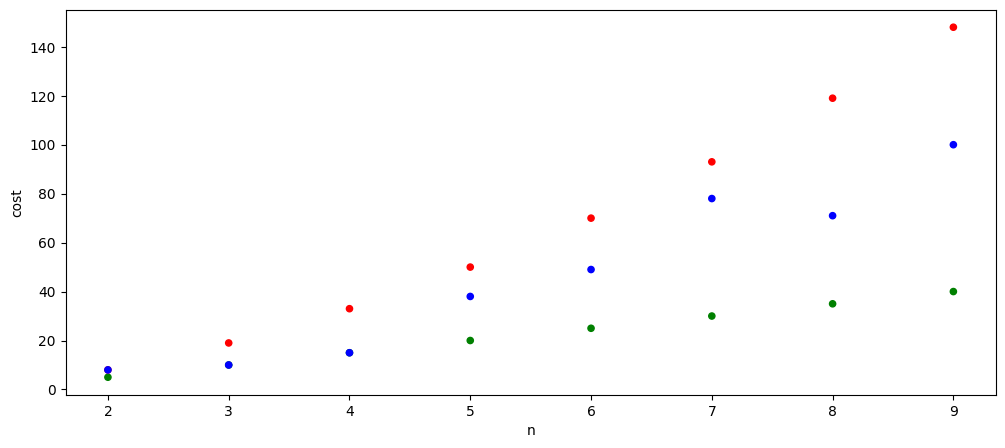

In [12]:
cost=[]
# Zacznij od range(2,10,1) do range(2,500,1)
# Potem range(500,3000,100)

#max 3000
for n in range(2,10,1):
 
    A = [x for x in range(1,n+1,1)]
    D = [x for x in range(n,0,-1)]
    R = [randrange(n) for x in range(n)]

    c = insertionSort_with_cost(A)
    cost.append(['A',n]+c+[sum(c)])
    c = insertionSort_with_cost(D)
    cost.append(['D',n]+c+[sum(c)])
    c = insertionSort_with_cost(R)
    cost.append(['R',n]+c+[sum(c)])
df = show_plot(cost)

In [13]:
df

,type,n,c1,c2,c4,c5,c6,c7,c8,cost
0,A,2,1,1,1,1,0,0,1,5
3,A,3,2,2,2,2,0,0,2,10
6,A,4,3,3,3,3,0,0,3,15
9,A,5,4,4,4,4,0,0,4,20
12,A,6,5,5,5,5,0,0,5,25
15,A,7,6,6,6,6,0,0,6,30
18,A,8,7,7,7,7,0,0,7,35
21,A,9,8,8,8,8,0,0,8,40
1,D,2,1,1,1,2,1,1,1,8
4,D,3,2,2,2,5,3,3,2,19
